In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Processing Data

In [2]:
liver_df = pd.read_csv('data/indian_liver_patient.csv')
liver_df = liver_df.rename(columns= {'Dataset': 'Valid_Patient', 'Gender': 'Is_Male'})

m = {'Male': 1, 'Female': 0}
liver_df['Is_Male'] = liver_df['Is_Male'].map(m)

In [3]:
liver_df

,Age,Is_Male,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Valid_Patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
x = []
for i in liver_df['Valid_Patient']:
    x.append(i)
for i in range(len(x)):
    if x[i] == 2:
        x[i] = x[i] - 2
        
liver_df['Valid_Patient'] = x
liver_df

,Age,Is_Male,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Valid_Patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
liver_df = liver_df.dropna()
liver_df.isnull().sum()

Age                           0
Is_Male                       0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Valid_Patient                 0
dtype: int64

In [6]:
X = liver_df.drop(columns = 'Valid_Patient')
y = liver_df['Valid_Patient']

In [7]:
X

,Age,Is_Male,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Valid_Patient, Length: 579, dtype: int64

# Visualizing Data and Making Correlations

[Text(0.5, 1.0, 'Patient Class vs Age')]

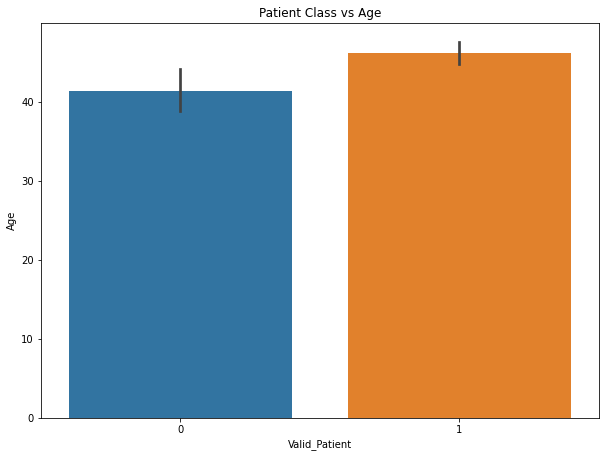

In [9]:
a4_dims = (10, 7.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=y, y=X['Age']).set(title='Patient Class vs Age')

[Text(0.5, 1.0, 'Patient Class vs Gender')]

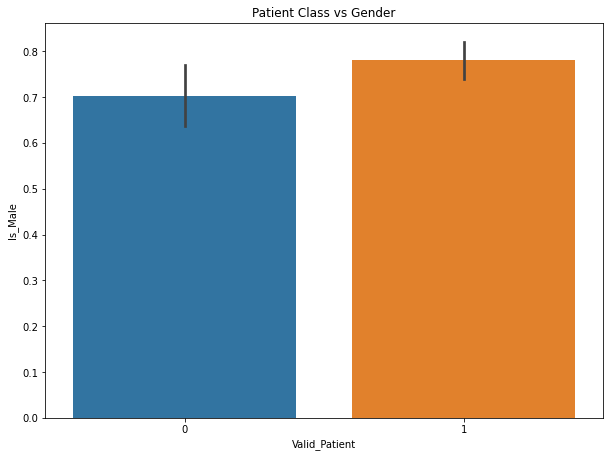

In [10]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=y, y=X['Is_Male']).set(title='Patient Class vs Gender')

[Text(0.5, 1.0, 'Patient Class vs Total Bilirubin')]

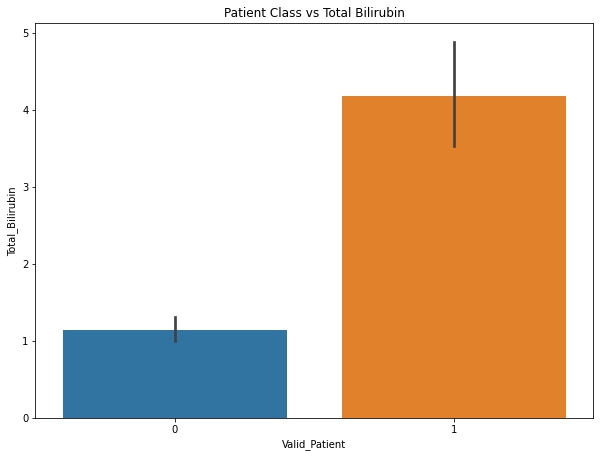

In [11]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=y, y=X['Total_Bilirubin']).set(title='Patient Class vs Total Bilirubin')

[Text(0.5, 1.0, 'Patient Class vs Direct Bilirubin')]

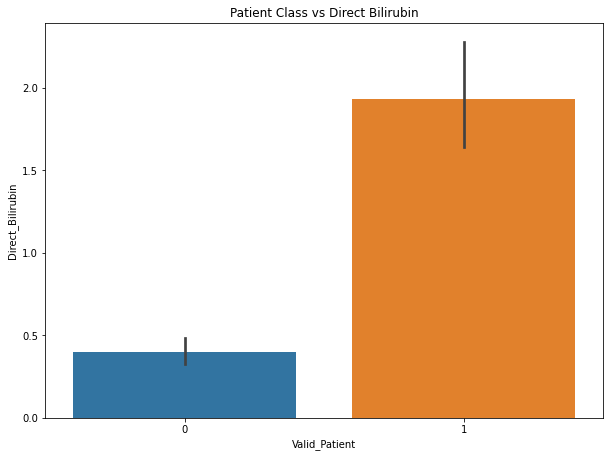

In [12]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=y, y=X['Direct_Bilirubin']).set(title='Patient Class vs Direct Bilirubin')

[Text(0.5, 1.0, 'Patient Class vs Alkaline Phosphotase')]

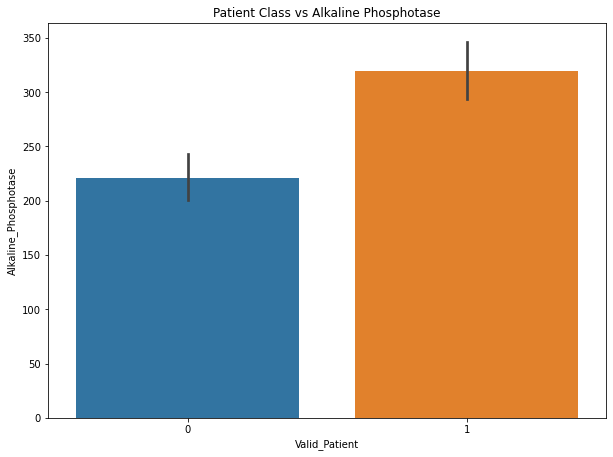

In [13]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=y, y=X['Alkaline_Phosphotase']).set(title='Patient Class vs Alkaline Phosphotase')

[Text(0.5, 1.0, 'Patient Class vs Alamine Aminotransferase')]

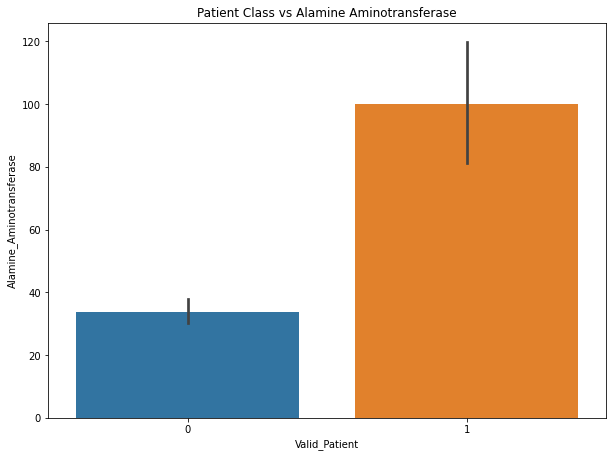

In [14]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=y, y=X['Alamine_Aminotransferase']).set(title='Patient Class vs Alamine Aminotransferase')

[Text(0.5, 1.0, 'Patient Class vs Aspartate Aminotransferase')]

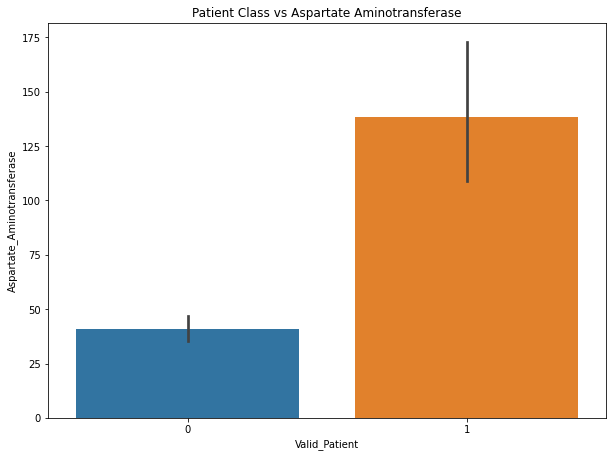

In [15]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=y, y=X['Aspartate_Aminotransferase']).set(title='Patient Class vs Aspartate Aminotransferase')

[Text(0.5, 1.0, 'Patient Class vs Toal Protiens')]

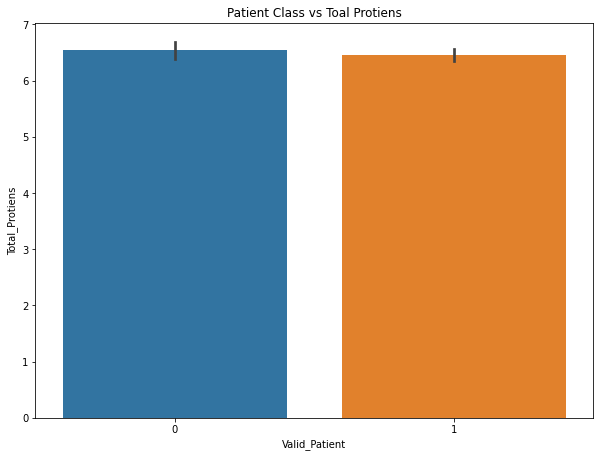

In [16]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=y, y=X['Total_Protiens']).set(title='Patient Class vs Toal Protiens')

[Text(0.5, 1.0, 'Patient Class vs Alkaline Albumin')]

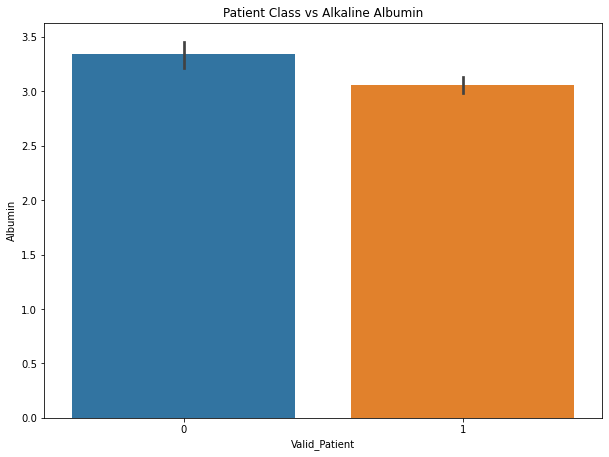

In [17]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=y, y=X['Albumin']).set(title='Patient Class vs Alkaline Albumin')

[Text(0.5, 1.0, 'Patient Class vs Albumin/Globulin Ratio')]

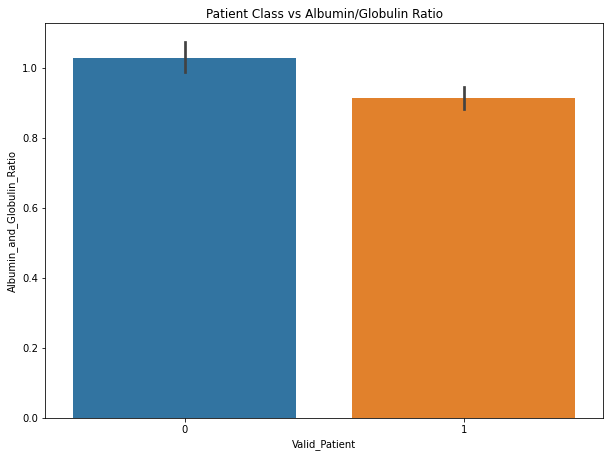

In [18]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=y, y=X['Albumin_and_Globulin_Ratio']).set(title='Patient Class vs Albumin/Globulin Ratio')

[Text(0.5, 1.0, 'Direct Bilirubin vs Alamine Aminotransferase vs Patient Class')]

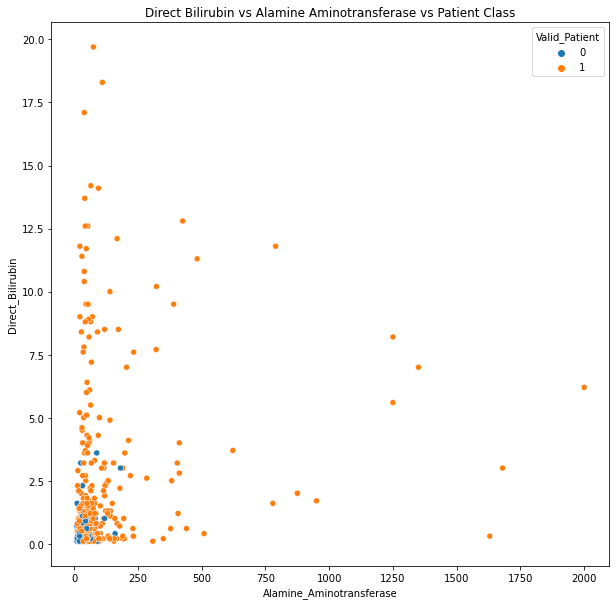

In [19]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, x=X['Alamine_Aminotransferase'], y=X['Direct_Bilirubin'], hue=y).set(title='Direct Bilirubin vs Alamine Aminotransferase vs Patient Class')

-----
**Most Dominat Featuers**:
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphatase
- Alanine Aminotransferase
- Aspartate Aminotransferase


# Obtaining Average Metrics per Class

In [25]:
classes = [0,1]
for i in classes:
    if (i == 0):
        print('Average False Patient Metrics')
    else:
        print('Average True Patient Metrics')
    print('-----------------------------------------')
    print(liver_df.loc[liver_df['Valid_Patient'] == i].mean(), '\n\n')

Average False Patient Metrics
-----------------------------------------
Age                            41.363636
Is_Male                         0.703030
Total_Bilirubin                 1.144848
Direct_Bilirubin                0.396364
Alkaline_Phosphotase          220.684848
Alamine_Aminotransferase       33.836364
Aspartate_Aminotransferase     40.763636
Total_Protiens                  6.539394
Albumin                         3.339394
Albumin_and_Globulin_Ratio      1.029576
Valid_Patient                   0.000000
dtype: float64 


Average True Patient Metrics
-----------------------------------------
Age                            46.144928
Is_Male                         0.780193
Total_Bilirubin                 4.180435
Direct_Bilirubin                1.931643
Alkaline_Phosphotase          319.536232
Alamine_Aminotransferase       99.973430
Aspartate_Aminotransferase    138.173913
Total_Protiens                  6.458696
Albumin                         3.058454
Albumin_and_Globuli

In [27]:
d = dict.fromkeys(classes, 1)
for i in classes:
    a = []
    series = liver_df.loc[liver_df['Valid_Patient'] == i].mean()
    for j in series:
        a.append(j)
    d[i] = a
    a = []

In [42]:
df_metrics = pd.DataFrame.from_dict(d, orient='index', columns=list(liver_df.columns)[:11])
df_metrics = df_metrics.drop(columns='Valid_Patient')
df_metrics = df_metrics.rename({0: 'False Patient', 1: 'True Patient'}, axis='index')

In [43]:
df_metrics

,Age,Is_Male,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
False Patient,41.363636,0.703030,1.144848,0.396364,220.684848,33.836364,40.763636,6.539394,3.339394,1.029576
True Patient,46.144928,0.780193,4.180435,1.931643,319.536232,99.973430,138.173913,6.458696,3.058454,0.914179


In [44]:
df_metrics.to_csv('avg_patient_metrics.csv')

In [46]:
liver_df.to_csv('final_processed_data.csv') # Moving processed df to csv so it can be used in further developments